In [25]:
import pandas as pd
import numpy as np
import acquire as a
import prepare as p
import model_functions as m


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


import warnings
warnings.filterwarnings('ignore')


In [2]:

from sklearn.model_selection import cross_val_predict, train_test_split
import scikitplot as skplt

Decision Tree results modeling

In [3]:
#acquiring data, prepping, splitting, isolating target variable

df = a.get_heart()
df = p.rename_cols(df)
df = p.replace_cat_values(df)
df = m.df_classification_ready(df, 'sex_female')
train, val, test = p.split_data(df, 'high_risk_of_mi')
X_Train, y_Train, X_val, y_val, X_test, y_test = m.isolate_target(train, val, test, 'high_risk_of_mi')


In [4]:
rf = m.get_random_forest_multiple(X_Train, y_Train, X_val, y_val)
rf

,min_samples_per_leaf,max_depth,train_recall,validate_recall,difference
36,5,6,0.917431,0.928571,-0.011140
53,7,7,0.880734,0.928571,-0.047837
1,1,3,0.899083,0.928571,-0.029489
37,5,7,0.935780,0.928571,0.007208
38,5,8,0.944954,0.928571,0.016383
39,5,9,0.944954,0.928571,0.016383
41,6,3,0.889908,0.928571,-0.038663
43,6,5,0.889908,0.928571,-0.038663
44,6,6,0.889908,0.928571,-0.038663
45,6,7,0.889908,0.928571,-0.038663


<AxesSubplot:ylabel='validate_recall'>

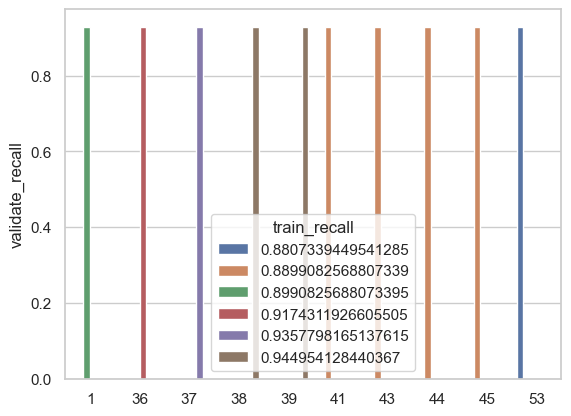

In [24]:
recall_chart = sns.barplot(data = rf, x= rf.index, y=rf.validate_recall, hue=rf.train_recall, )
recall_chart